### Multiclass Classification

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")

In [10]:
flight_data = pd.read_csv("/teamspace/studios/this_studio/Flight_delay_analysis/data/preprocessed_flight_data_for_binary_classification.csv")
flight_data.head(10)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,day,month,day_of_week,year,target
0,1.286792,1.286792,0.884229,0.001871,-0.543443,-0.528480,-0.554247,-0.606505,0.605839,-0.354125,-0.359484,-0.283785,0.265232,-0.285369,-0.039176,-0.586978,0.020407,-0.038968,-0.355765,False,False,0.611045,0.561823,0.596281,0.434838,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,9,1,2,2019,False
1,-1.101954,-1.101954,-0.874146,-0.493776,-0.779814,0.609352,0.415701,1.353425,1.346862,1.631967,1.569065,-0.324895,-0.834893,1.537494,1.456733,4.904470,1.611658,1.583455,-0.177429,False,False,1.295819,1.408972,1.118570,1.002968,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,19,11,5,2022,False
2,1.286792,1.286792,0.884229,0.001871,-1.174718,-0.842364,-0.830017,0.608652,0.415833,-0.767809,-0.661884,-0.078234,0.375244,-0.664716,-0.410783,-0.425465,-0.466351,-0.405564,-0.078354,False,False,-0.339252,-0.341802,-0.361250,-0.220042,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,22,7,4,2022,True
3,-1.101954,-1.101954,-0.874146,-0.493776,-0.123929,0.609352,0.415701,1.373025,1.204357,0.580264,0.555725,-0.222120,1.145331,0.563170,0.721102,0.220588,0.661599,0.724304,0.397207,False,False,1.645193,2.100811,1.989053,1.326155,-0.138889,-0.051551,1.456688,-0.017174,-0.178016,6,3,0,2023,True
4,1.116167,1.116167,0.180879,1.165449,-1.204479,0.373938,0.739017,-0.831897,-0.885707,1.055691,1.016334,-0.242675,-0.174818,0.998421,1.066166,1.028154,1.076028,1.075860,-0.098169,False,False,0.541170,0.646538,0.596281,0.298759,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,23,2,6,2020,False
5,0.945543,0.945543,1.060067,-1.546032,-1.056819,-0.901218,-0.896582,0.706648,0.710342,-0.652554,-0.187257,2.820028,-0.174818,-0.201514,-0.257211,-0.748491,-0.743940,-0.257045,2.715568,False,False,-1.149801,-1.160713,-1.101160,-1.068835,4.305829,-0.051551,-0.157574,-0.017174,-0.178016,31,7,2,2019,True
6,-1.272579,-1.272579,-1.401658,-0.454018,-0.216073,-0.871791,1.689947,-1.331680,-1.284719,-0.652554,-0.659881,-0.386560,0.705282,-0.656730,-0.647777,0.059075,-0.648152,-0.634921,-0.652990,False,False,-0.465027,-0.666543,-0.781983,-0.698020,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,11,6,6,2023,False
7,0.604293,0.604293,1.411742,1.260868,1.117445,-0.175360,-0.202403,-0.871096,1.688872,0.650240,0.613802,-0.324895,0.595269,0.611088,0.878466,5.389010,0.888362,1.015701,0.377392,False,False,-0.283353,0.208845,-0.346742,-0.334009,-0.138889,-0.051551,1.389428,-0.017174,-0.178016,8,7,0,2019,True
8,1.116167,1.116167,0.180879,1.165449,-1.099744,-0.106698,-0.211912,0.157868,0.244828,-1.640454,-1.609136,-0.263230,-0.614868,-1.627060,-1.527501,0.059075,-1.512197,-1.432032,-0.296319,False,False,1.184019,1.168947,1.278159,0.968948,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,12,2,6,2023,False
9,-1.613828,-1.613828,-1.225820,-0.122703,-1.309787,1.354827,1.347612,-0.586906,-0.629199,1.642257,1.573070,-0.386560,0.265232,1.561452,1.686143,-0.748491,1.689852,1.669934,-0.058539,False,False,0.946444,1.183066,1.249143,1.230900,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,22,8,5,2020,True


In [11]:
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476398 entries, 0 to 3476397
Data columns (total 35 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   airline                  float64
 1   airline_dot              float64
 2   airline_code             float64
 3   dot_code                 float64
 4   fl_number                float64
 5   origin                   float64
 6   origin_city              float64
 7   dest                     float64
 8   dest_city                float64
 9   crs_dep_time             float64
 10  dep_time                 float64
 11  dep_delay                float64
 12  taxi_out                 float64
 13  wheels_off               float64
 14  wheels_on                float64
 15  taxi_in                  float64
 16  crs_arr_time             float64
 17  arr_time                 float64
 18  arr_delay                float64
 19  cancelled                bool   
 20  diverted                 bool   
 21  crs_elap

In [12]:
flight_data.isna().sum()

airline                    0
airline_dot                0
airline_code               0
dot_code                   0
fl_number                  0
origin                     0
origin_city                0
dest                       0
dest_city                  0
crs_dep_time               0
dep_time                   0
dep_delay                  0
taxi_out                   0
wheels_off                 0
wheels_on                  0
taxi_in                    0
crs_arr_time               0
arr_time                   0
arr_delay                  0
cancelled                  0
diverted                   0
crs_elapsed_time           0
elapsed_time               0
air_time                   0
distance                   0
delay_due_carrier          0
delay_due_weather          0
delay_due_nas              0
delay_due_security         0
delay_due_late_aircraft    0
day                        0
month                      0
day_of_week                0
year                       0
target        

In [13]:
# Drop or keep the original target column based on necessity
flight_data = flight_data.drop(columns=['target'])

In [14]:
flight_data.columns

Index(['airline', 'airline_dot', 'airline_code', 'dot_code', 'fl_number',
       'origin', 'origin_city', 'dest', 'dest_city', 'crs_dep_time',
       'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on',
       'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'diverted', 'crs_elapsed_time', 'elapsed_time', 'air_time', 'distance',
       'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
       'delay_due_security', 'delay_due_late_aircraft', 'day', 'month',
       'day_of_week', 'year'],
      dtype='object')

In [15]:
# Define conditions for each delay type
conditions = [
    (flight_data['delay_due_carrier'] > 0),
    (flight_data['delay_due_weather'] > 0),
    (flight_data['delay_due_nas'] > 0),
    (flight_data['delay_due_security'] > 0),
    (flight_data['delay_due_late_aircraft'] > 0),
]

# Assign class labels for each condition
classes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Create the new target column
flight_data['delay_category'] = np.select(conditions, classes, default='no_delay')

In [16]:
flight_data.sample(20)

,airline,airline_dot,airline_code,dot_code,fl_number,origin,origin_city,dest,dest_city,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,elapsed_time,air_time,distance,delay_due_carrier,delay_due_weather,delay_due_nas,delay_due_security,delay_due_late_aircraft,day,month,day_of_week,year,delay_category
2013715,-1.101954,-1.101954,-0.874146,-0.493776,-0.323098,0.609352,0.415701,0.157868,0.244828,-0.158603,-0.173238,-0.324895,-0.504855,-0.193527,-0.096055,0.543614,-0.092974,-0.082207,-0.454840,False,False,1.267869,1.183066,1.234635,1.234302,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,28,6,4,2019,no_delay
17023,0.604293,0.604293,1.411742,1.260868,1.063074,0.050245,0.596378,-0.047925,-0.173185,0.417672,0.383498,-0.366005,0.485257,0.379487,0.482212,-0.263951,0.604908,0.481787,-0.791696,False,False,0.107946,-0.200611,-0.245186,-0.245557,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,7,3,5,2020,no_delay
86418,0.945543,0.945543,1.060067,-1.546032,-0.857078,-0.871791,1.689947,0.402859,-1.056712,-0.189475,-0.161222,0.106761,-0.394843,-0.099689,-0.251523,0.382101,-0.313872,-0.238245,0.139612,False,False,-0.381177,-0.355921,-0.346742,-0.354420,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,3,9,4,2021,no_delay
1670859,-0.760704,-0.760704,0.005042,1.117740,0.780345,1.737374,1.575835,0.745847,-1.056712,1.207993,1.148509,-0.407115,-0.724880,1.120212,0.743854,1.997233,0.876633,0.842743,-0.534100,False,False,-0.800426,-0.906568,-1.014112,-0.995693,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,5,11,1,2019,no_delay
2254778,0.774918,0.774918,0.532554,0.868591,1.407042,0.295467,0.120913,-0.831897,-0.885707,0.991889,0.854120,-0.448225,-0.064806,0.918559,0.851923,1.351180,0.888362,0.867182,-0.395395,False,False,-0.646702,-0.624185,-0.752967,-0.703123,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,21,4,4,2023,no_delay
3224262,-1.101954,-1.101954,-0.874146,-0.493776,-0.587410,-1.587840,-1.495668,-0.968063,-1.033782,1.339336,1.311239,-0.218635,0.238754,1.363285,1.297640,-0.102438,1.274588,1.292224,0.169637,False,False,-0.803837,-0.538034,-0.573903,-0.678582,-0.015041,-0.051551,-0.060216,-0.017174,-0.178016,28,2,6,2021,no_delay
703410,0.604293,0.604293,1.411742,1.260868,1.154074,-1.058160,-1.096277,0.647850,0.539337,-1.206190,-1.194588,-0.345450,3.345580,-1.062033,-1.148310,-0.102438,-1.254157,-1.057916,0.238687,False,False,-1.038001,-0.638304,-1.086652,-1.109659,-0.138889,-0.051551,0.918601,-0.017174,-0.178016,23,1,3,2020,nas_delay
3074465,-1.272579,-1.272579,-1.401658,-0.454018,-0.139256,-0.832060,-0.885190,0.139837,0.132325,0.654162,0.763554,0.352513,2.134053,0.788311,0.685414,-0.101078,0.503676,0.685173,0.792924,False,False,0.568738,0.900505,0.654191,0.418064,0.616464,-0.051551,0.986854,-0.017174,-0.060444,16,2,2,2021,carrier_delay
1845119,0.092419,0.092419,-1.049983,1.146895,-1.278309,1.374445,1.204973,-0.528108,-0.553196,2.064173,2.023666,0.024541,-0.174818,2.002693,-1.343593,-0.425465,-1.453552,-1.255314,0.179242,False,False,2.441766,2.580862,2.714455,3.018638,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,19,2,1,2019,no_delay
2005143,1.286792,1.286792,0.884229,0.001871,-0.425544,0.373938,0.739017,-0.606505,0.605839,-0.370590,-0.379511,-0.324895,0.045207,-0.389191,-0.198436,0.059075,-0.118387,-0.114167,-0.534100,False,False,0.289621,0.138249,0.132023,0.217111,-0.138889,-0.051551,-0.157574,-0.017174,-0.178016,13,1,4,2023,no_delay


In [17]:
flight_data.delay_category.value_counts()

delay_category
no_delay               2728958
carrier_delay           368739
nas_delay               199553
late_aircraft_delay     134507
weather_delay            42448
security_delay            2193
Name: count, dtype: int64

/tmp/ipykernel_41436/2276662804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=flight_data, x='delay_category',palette='magma')


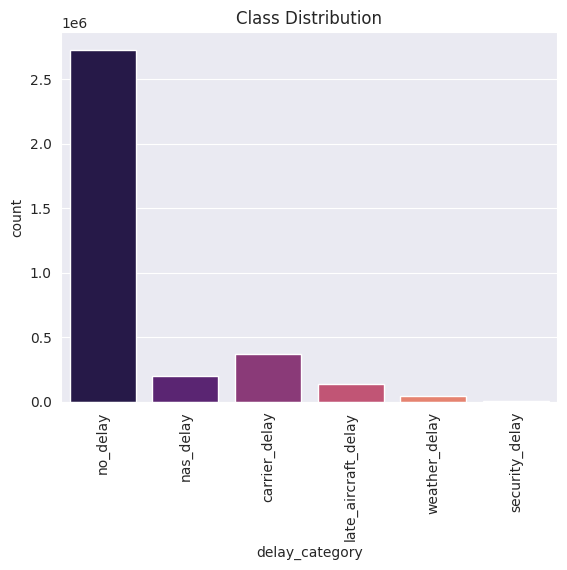

In [22]:
# Visualize the distribution

sns.countplot(data=flight_data, x='delay_category',palette='magma')
plt.title('Class Distribution')
plt.xticks(rotation=90)
plt.show()


### Data Preparation

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [24]:
# handle class imbalance 
from imblearn.over_sampling import SMOTE

def balance_with_smote(df: pd.DataFrame, target_column: str):
    """
    Apply SMOTE to balance the dataset.

    Parameters:
        df (pd.DataFrame): Input DataFrame (encoded and scaled).
        target_column (str): Name of the target column.

    Returns:
        X_resampled (pd.DataFrame): Resampled feature set.
        y_resampled (pd.Series): Resampled target column.
    """
    X = df.drop(columns=[target_column])
    y = df[target_column]

    smote = SMOTE(random_state=142)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Convert back to DataFrame
    X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
    y_resampled = pd.Series(y_resampled, name=target_column)

    return X_resampled, y_resampled

In [25]:
# Assuming `flight_data` is your DataFrame
features_to_drop = [
    'delay_due_carrier', 'delay_due_weather', 'delay_due_nas',
    'delay_due_security', 'delay_due_late_aircraft', 'delay_category'
]

# Prepare features and target
X = flight_data.drop(columns=features_to_drop)
y = flight_data['delay_category']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Combine train set for balancing
train_data = pd.concat([X_train, y_train], axis=1)

In [ ]:
# encode the delay category into numeric


In [26]:
# Balancing the target class 
X_balanced, y_balanced = balance_with_smote(flight_data, target_column='delay_category')

In [27]:
# Check class distribution
print("Class distribution after SMOTE:")
print(y_balanced.value_counts())

Class distribution after SMOTE:
delay_category
no_delay               2728958
nas_delay              2728958
carrier_delay          2728958
late_aircraft_delay    2728958
weather_delay          2728958
security_delay         2728958
Name: count, dtype: int64


### Model Building and Evaluation

In [28]:
# Train a logistic regression model

model = LogisticRegression(
    multi_class='multinomial', 
    solver='lbfgs', 
    class_weight='balanced', 
    max_iter=500
)
    
model.fit(X_resampled, y_resampled)

# Evaluate the model on the test set
y_pred = model.predict(X_test)

NameError: name 'X_resampled' is not defined

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#### 1. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred_rf = model.predict(X_test)

In [ ]:
# Model Evaluation for Random Forest
print("\nRandom Forest:")

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])}")

In [ ]:
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred_rf))
print("Classification report:\n", classification_report(y_test, y_pred_rf))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()

#### 2. Gradient Boost Classifier

In [ ]:
# xg boost 
xgb = XGBClassifier(random_state=142)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

In [ ]:
# Model Evaluation for XGBoost
print("\nGradient Boosting Machine (XGBoost):")

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb)}")
print(f"Recall: {recall_score(y_test, y_pred_xgb)}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb)}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])}")

In [ ]:
print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred_xgb))
print("Classification report:\n", classification_report(y_test, y_pred_xgb))

#### 3. Neural Network Model

In [ ]:
# Define the neural network
model = Sequential([
    Dense(64, activation='relu', input_dim=X_resampled.shape[1]),
    Dense(32, activation='relu'),
    Dense(y_resampled_onehot.shape[1], activation='softmax')  # Number of classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Train the neural network
history = model.fit(
    X_resampled, 
    y_resampled_onehot, 
    validation_split=0.2, 
    epochs=20, 
    batch_size=128, 
    verbose=1
)

In [ ]:
# Evaluate on the test set
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)

# Map back predictions to original class labels
y_test_labels = pd.factorize(y_test)[0]

# Classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred))